# Normalization

This jupyter notebook is for experiments and presentation of aplication of normalization technniques on dataset

In [1]:
import SimpleITK as sitk
from extensies import preprocessing as ppcs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from extensies import normalization
from extensies import preprocessing as pcs

### We load data of three MRI modalities

In [2]:
name = 'ProstateX-0000'
t2w_ser = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 't2tsetra', '../../data/PROSTATEx'))
adc_ser = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 'adc', '../../data/PROSTATEx'))

t2w_image = sitk.ReadImage(t2w_ser, sitk.sitkFloat32)
adc_image = sitk.ReadImage(adc_ser, sitk.sitkFloat32)
ktrans_image = sitk.ReadImage(ppcs.get_ktrans_path(name,'../../data/'))

4-t2tsetra-00702
7-ep2ddifftraDYNDISTADC-48780


Get any patches from images

In [14]:
vol_t2w = sitk.GetArrayFromImage(t2w_image)
patch2d_t2w = pcs.get_patch_from_image(t2w_image,[40,40,1], (25.7457, 31.8707, -38.511))
patch3d_t2w = pcs.get_patch_from_image(t2w_image,[40,40,10], (25.7457, 31.8707, -38.511))

vol_adc = sitk.GetArrayFromImage(adc_image)
patch2d_adc = pcs.get_patch_from_image(adc_image,[40,40,1], (25.7457, 31.8707, -38.511))
patch3d_adc = pcs.get_patch_from_image(adc_image,[40,40,10], (25.7457, 31.8707, -38.511))

vol_ktrans = sitk.GetArrayFromImage(ktrans_image)
patch2d_ktrans = pcs.get_patch_from_image(ktrans_image,[40,40,1], (25.7457, 31.8707, -38.511))
patch3d_ktrans = pcs.get_patch_from_image(ktrans_image,[40,40,10], (25.7457, 31.8707, -38.511))

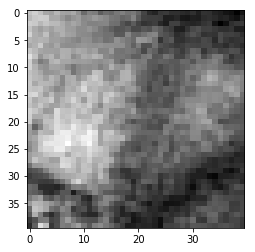

In [15]:
plt.imshow(patch2d_t2w,cmap = 'gray')

### show intensities distributions for these modalities

Text(0.5, 1.0, 'Histogram with z-normalized elements')

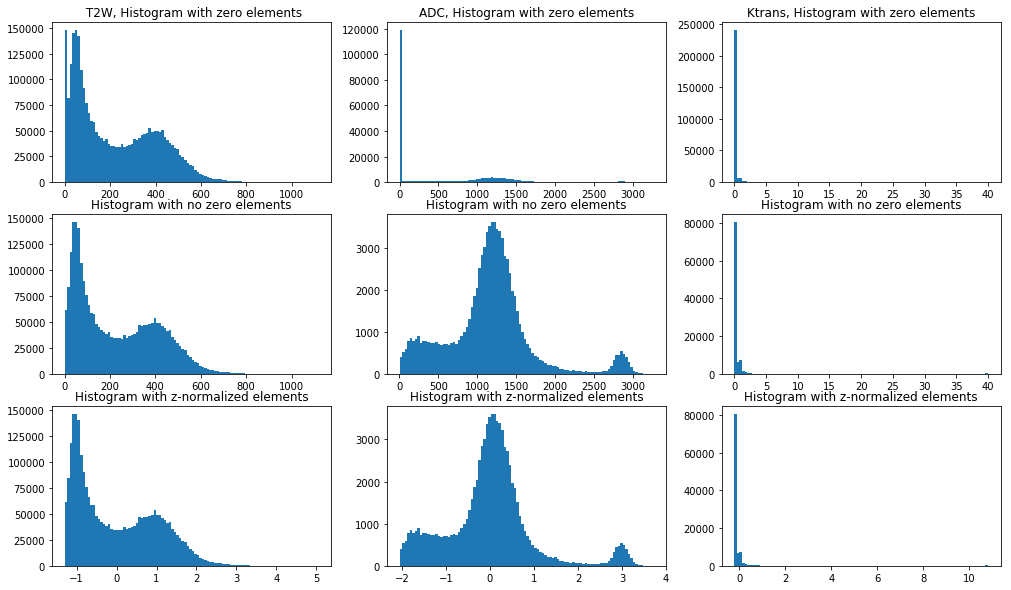

In [28]:
fig = plt.figure(figsize = (17,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
f2_ax1 = fig.add_subplot(spec2[0, 0])
f2_ax2 = fig.add_subplot(spec2[1, 0])
f2_ax3 = fig.add_subplot(spec2[2, 0])
f2_ax4 = fig.add_subplot(spec2[0, 1])
f2_ax5 = fig.add_subplot(spec2[1, 1])
f2_ax6 = fig.add_subplot(spec2[2, 1])
f2_ax7 = fig.add_subplot(spec2[0, 2])
f2_ax8 = fig.add_subplot(spec2[1, 2])
f2_ax9 = fig.add_subplot(spec2[2, 2])

vol = vol_t2w
f2_ax1.hist(vol.flatten(),bins = 100)
f2_ax1.set_title(" T2W, Histogram with zero elements")

vol_nonzero_voxels = vol[vol>0]
f2_ax2.hist(vol_nonzero_voxels.flatten(),bins = 100)
f2_ax2.set_title("Histogram without zero elements")

normalized_volume = (vol_nonzero_voxels - vol_nonzero_voxels.mean()) / vol_nonzero_voxels.std()
f2_ax3.hist(normalized_volume.flatten(),bins = 100)
f2_ax3.set_title("Histogram with z-normalized elements")

vol = vol_adc
f2_ax4.hist(vol.flatten(),bins = 100)
f2_ax4.set_title("ADC, Histogram with zero elements")

vol_nonzero_voxels = vol[vol>0]
f2_ax5.hist(vol_nonzero_voxels.flatten(),bins = 100)
f2_ax5.set_title("Histogram without zero elements")

normalized_volume = (vol_nonzero_voxels - vol_nonzero_voxels.mean()) / vol_nonzero_voxels.std()
f2_ax6.hist(normalized_volume.flatten(),bins = 100)
f2_ax6.set_title("Histogram with z-normalized elements")

vol = vol_ktrans
f2_ax7.hist(vol.flatten(),bins = 100)
f2_ax7.set_title("Ktrans, Histogram with zero elements")

vol_nonzero_voxels = vol[vol>0]
f2_ax8.hist(vol_nonzero_voxels.flatten(),bins = 100)
f2_ax8.set_title("Histogram without zero elements")

normalized_volume = (vol_nonzero_voxels - vol_nonzero_voxels.mean()) / vol_nonzero_voxels.std()
f2_ax9.hist(normalized_volume.flatten(),bins = 100)
f2_ax9.set_title("Histogram with z-normalized elements")

# Z-Score Normalization

In [29]:
zscore = normalization.ZScoreNormalization()

In [30]:
zscore.fit(vol)

The parameters fitted are (1.0, 0.3102795535146929, 2.2921797401876085)


(1.0, 0.3102795535146929, 2.2921797401876085)

The parameters fitted are (1.0, 1166.3878, 564.93304)


Text(0.5, 1.0, 'Histogram with 3D image patch')

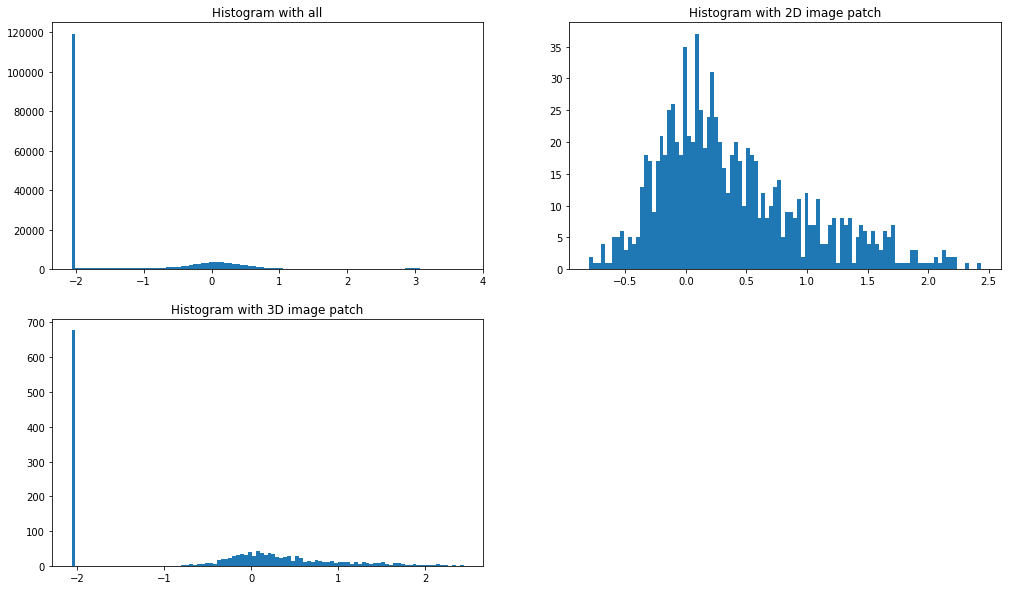

In [31]:
fig = plt.figure(figsize = (17,10))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[0, 1])
ax3 = fig.add_subplot(spec2[1, 0])
# ax4 = fig.add_subplot(spec2[1, 1])
vol = vol_adc
zscore = normalization.ZScoreNormalization()
zscore.fit(vol[vol>10])
patch2d = patch2d_adc
patch3d = patch2d_adc
a = ax1.hist(zscore.normalise(vol).flatten(),bins = 100)
ax1.set_title("Histogram with all")

ax2.hist(zscore.normalise(patch2d[patch2d>0]).flatten(),bins = 100)
ax2.set_title("Histogram with 2D image patch")

ax3.hist(zscore.normalise(patch3d).flatten(),bins = 100)
ax3.set_title("Histogram with 3D image patch")

## MinMax normalization

Text(0.5, 1.0, 'Histogram with 3D image patch')

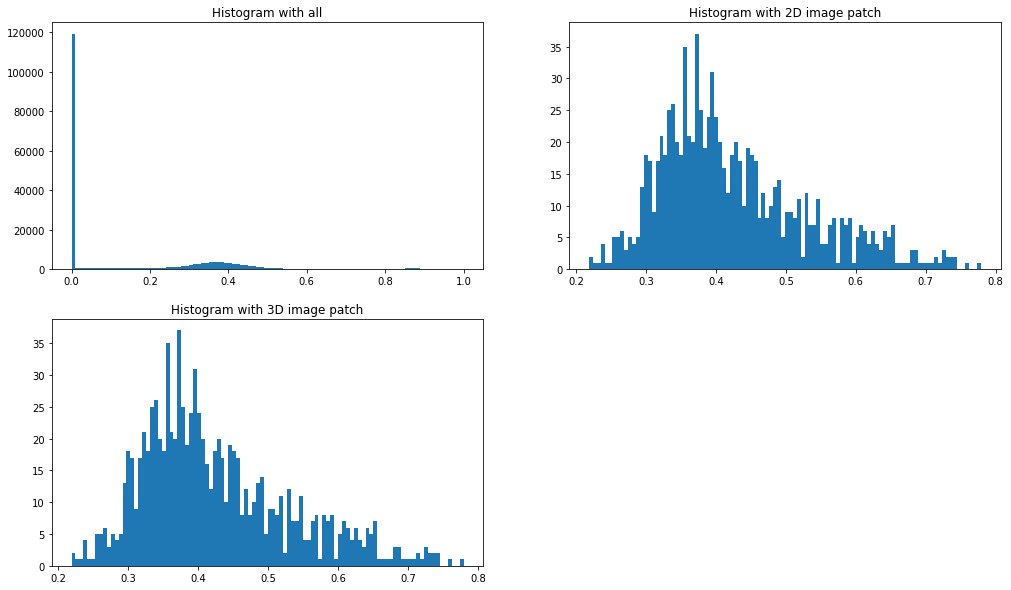

In [32]:
fig = plt.figure(figsize = (17,10))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec2[0, 0])
ax2 = fig.add_subplot(spec2[0, 1])
ax3 = fig.add_subplot(spec2[1, 0])
# ax4 = fig.add_subplot(spec2[1, 1])
vol = vol_adc
zscore = normalization.ScaleNormalization()
zscore.fit(vol)
patch2d = patch2d_adc
patch3d = patch2d_adc
a = ax1.hist(zscore.normalise(vol).flatten(),bins = 100)
ax1.set_title("Histogram with all")

ax2.hist(zscore.normalise(patch2d[patch2d>0]).flatten(),bins = 100)
ax2.set_title("Histogram with 2D image patch")

ax3.hist(zscore.normalise(patch3d[patch3d>0]).flatten(),bins = 100)
ax3.set_title("Histogram with 3D image patch")